In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def calculate_mu(var_index, point, mean, b, c):
    return mean[var_index] + (b * (point[~var_index] - mean[~var_index])) / c

def calculate_sigma(a, b, c):
    return np.sqrt(a - (b ** 2) / c)

def get_conditional_distribution(var_index, point, mean, cov):
    a, b, c = cov[var_index, var_index], cov[var_index, ~var_index], cov[~var_index, ~var_index]

    mu = calculate_mu(var_index, point, mean, b, c)
    sigma = calculate_sigma(a, b, c)
    new_point = np.copy(point)
    new_point[var_index] = np.random.randn() * sigma + mu
    return new_point

def gibbs_sampling(num_samples, mean, cov):
    var_index = 0
    points = []
    point = np.array([0.0, 0.0])
    for i in range(num_samples):
        point = get_conditional_distribution(var_index, point, mean, cov)
        point = get_conditional_distribution(~var_index, point, mean, cov)
        points.append(point)
    return points

In [58]:
mean = np.array([10.0, -5.0])
cov = np.array([[5.0, 0.5], 
                [0.5, 2.0]])
points = gibbs_sampling(500, mean, cov)

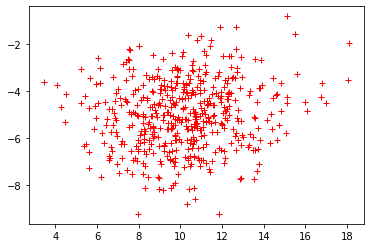

In [59]:
for i in range(len(points)):
    x, y = points[i]
    plt.plot(x, y, 'r+')
plt.show()